#  <center><span style="color:darkblue; font-size:3em;">Team JS3  </span>

<img src="https://www.publichealthnotes.com/wp-content/uploads/2017/11/Featured-image-678x381.jpg" width="300" height="300" align="centre"/>

## Overview

This notebook illustrates the process taken to find a model that can predict the sentiment of twitter data in relation to whether or not they believe in climate change. From a marketing perspective for a company that sells items to lessen environmental impact, it is important to gauge how the potential customers feel and how their products will be perceived, and to whom to focus their advertising.

## Problem identification

### <center> Challenge: Climate Change Belief Analysis

Team JS3 was challenged by EDSA(Explore Data Science Academy), with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based solely on their novel tweet data. This task is performed with supervised learning through classification.

#### Background  

In a [research article](https://www.barrons.com/articles/two-thirds-of-north-americans-prefer-eco-friendly-brands-study-finds-51578661728) conducted, 19,000 customers from 28 countries where given a poll to find out how individual shopping decisions are changing. Nearly 70% of consumers in the U.S. and Canada find that it is important for a company or brand to be sustainable or eco-friendly. More than a third (40%) of the respondents globally said that they are purpose-driven consumers, who select brands based on how well they align with their personal beliefs.

Many companies are built around lessening their environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.  


#### Problem statement  

Build a machine learning model that is able to classify whether or not an individual believes in man-made climate change based on historical tweet data to increase insights about customers and inform future marketing strategies.

You can find the project overview [here](https://www.kaggle.com/c/edsa-climate-change-belief-analysis-2021/overview).

## Table of contents  
<a id='toc'></a>
1. [Importing packages](#imp_pac)  

2. [Importing the data](#imp_dat)  
    
3. [Data description](#ddescribe)   

4. [Exploratory data analysis](#eda)    
    
5. [Preprocessing](#prep)  
  
6. [Feature extraction](#vect)  
 
7. [Model training](#train) 
   
8. [Evaluate model accuracy](#eval)  
    
9. [Conclusion](#conclude)

10. [Kaggle Submission](#kaggle) 

## 1. Importing packages 
<a id='imp_pac'></a>
[Back to table of contents](#toc)

In [1]:
# Import Packages for Data Manipulation and Natural Languge Processing
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('stopwords')
nltk.download('punkt')

# Import Packages for Data Visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
%matplotlib inline

# Import Packages for Feature Extraction
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Import Packages for train test split
from sklearn.model_selection import train_test_split

# Import Machine Learning Packages
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# Import libraries for model evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Importing the data
<a id='imp_dat'></a>
[Back to table of contents](#toc)

In [2]:
train = pd.read_csv('train.csv') # Importing the training data
train.head() # Viewing the top 5 rows

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
test = pd.read_csv('test.csv')# Importing the testing data
test.head()# Viewing the top 5 rows

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## 3. Data description
<a id='ddescribe'></a>
[Back to table of contents](#toc)

The datasets that will be used in this classification project aggregates tweets pertaining to climate change, collected between Apr 27, 2015 and Feb 21, 2018. The train dataset consists of 3 columns; "tweetid", "sentiment" and "message", where we set "tweetid" to be the index of the dataset. A description of each variable in the dataset is given below.  
### Training set
**Variable definitions:**  

- **tweetid** - Unique Twitter ID .
- **message** - Tweet body.       
- **sentiment** - Sentiment of tweet.  

**Each tweet is then labeled as one of the following classes:**  
 
    
| **Class** | **Tag** | **Description** |
|:---------:|:----------------:|:----------------|
|   **2**   | **News** |The tweet links to factual news about climate change |
|   **1**   | **Pro** |The tweet supports the belief of man-made climate change |
|   **0**   | **Neutral** |The tweet neither supports nor refutes the belief of man-made climate change |
|  **-1**   | **Anti** |The tweet does not believe in man-made climate change |  

### Testing set  
During testing we do not have access to the **tweetid** variable, but the testing dataset remains the same as the training dataset otherwise.  


### Data types 
​
Let's get quick overview of the datasets we will be working with throughout the notebook. The output below contains the shape of the dataset, a list of all columns with their data types and the number of non-null values present in each column.  
​
**Train data**  
​

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The train dataset has 15819 entries, contains no null entries, and the data types for "sentiment" and "message" are integer and object respectively.  

**Test data** 

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


The test dataset has 10546 entries, contains no null entries, and the variable "message" has the object data type.

## 4. Exploratory Data Analysis
<a id='eda'></a>
[Back to table of contents](#toc)

The data will now be explored and analysed by looking at the distribution of the target variable, and by analysing the 'message' column.

In [4]:
train_1= train
# Change the sentiment score to words
train_1 = train_1['sentiment'].replace({-1: 'Disbelief in Climate Change',0:'Neutral',1:'Belief in Climate Change',2:'News Article'})

### Distribution of the Target Variable

In [5]:
# Distribution plot of the target variable
fig = px.histogram(train_1, x="sentiment")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Count of Sentiment Score')
fig.show()

The distribution is skewed towards the class that believes in climate change. This signifies a class imbalance, that will need to be adressed.

### Text Cleaning

The "message" column is currently in its raw form and needs to be cleaned for to properly explore, analyze and provide predictions for sentiments. In order to make proper inferences and visuals, some work must be done on the raw message column

First, the message column will be extracted and transformed into a pandas series, in order to work with the message column more efficiently.

In [8]:
# Extract tweets from dataframe & creating a series with only the 'message column'
tweets = train['message']

# View top 5 rows of tweets
tweets[:5]

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
4    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: message, dtype: object

Now the text cleaning will commence.  Because the 'message' column contains raw twitter data, there will be a lot of noise that needs to be removed.  The function created below will remove most of the noise from the 'message' column.

In [9]:
def clean_tweets(tweets):
    '''This function takes in a pandas series with a single column and then removes noise associated with twitter data'''
    # Replace email addresses with 'emailaddress'
    tweets = tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
    # Remove unicode strings
    tweets = tweets.str.replace(r'(\\u[0-9A-Fa-f]+)', '')
    tweets = tweets.str.replace(r'[^\x00-\x7f]', '')

    #Replce websites with 'url-web'
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = r'url-web'

    tweets = tweets.str.replace(pattern_url,subs_url, regex = True)

    # Remove special characters, numbers, punctuation
    tweets = tweets.str.replace('[^a-zA-Z#@]+',' ')

    # Remove additional white spaces
    tweets = tweets.str.replace(r'\s+', ' ')
    tweets = tweets.str.replace(r'^\s+|\s+?$', '')

    # Change words to lower case
    tweets = tweets.str.lower()

    # Remove stop words from tweets
    stop_words = set(stopwords.words('english'))

    tweets = tweets.apply(lambda x: ' '.join(
        word for word in x.split() if word not in stop_words))
    return tweets

The function will now be applied to the pandas series

In [10]:
tweets = clean_tweets(tweets)

In [11]:
# Viewing the changed message column
tweets[:5]

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt @rawstory researchers say three years act c...
3    #todayinmaker# wired pivotal year war climate ...
4    rt @soynoviodetodas racist sexist climate chan...
Name: message, dtype: object

A pandas dataframe will now be created with the cleaned 'message' column, and the 'sentiment' column will be added to it.

In [12]:
# Creating a dataframe from the cleaned up message column
twitter = pd.DataFrame(tweets)

# Add the target variable
twitter['sentiment'] = train['sentiment']

# View the top 5 rows of tweets
twitter.head()

,message,sentiment
0,polyscimajor epa chief think carbon dioxide ma...,1
1,like lack evidence anthropogenic global warming,1
2,rt @rawstory researchers say three years act c...,2
3,#todayinmaker# wired pivotal year war climate ...,1
4,rt @soynoviodetodas racist sexist climate chan...,1


## Wordclouds
Wordclouds are now generated in order to visualise the most frequently appearing words.  The dataframe will be subsetted according to the sentiment score, in order to compare the ords that appear most frequently.

(-0.5, 399.5, 199.5, -0.5)

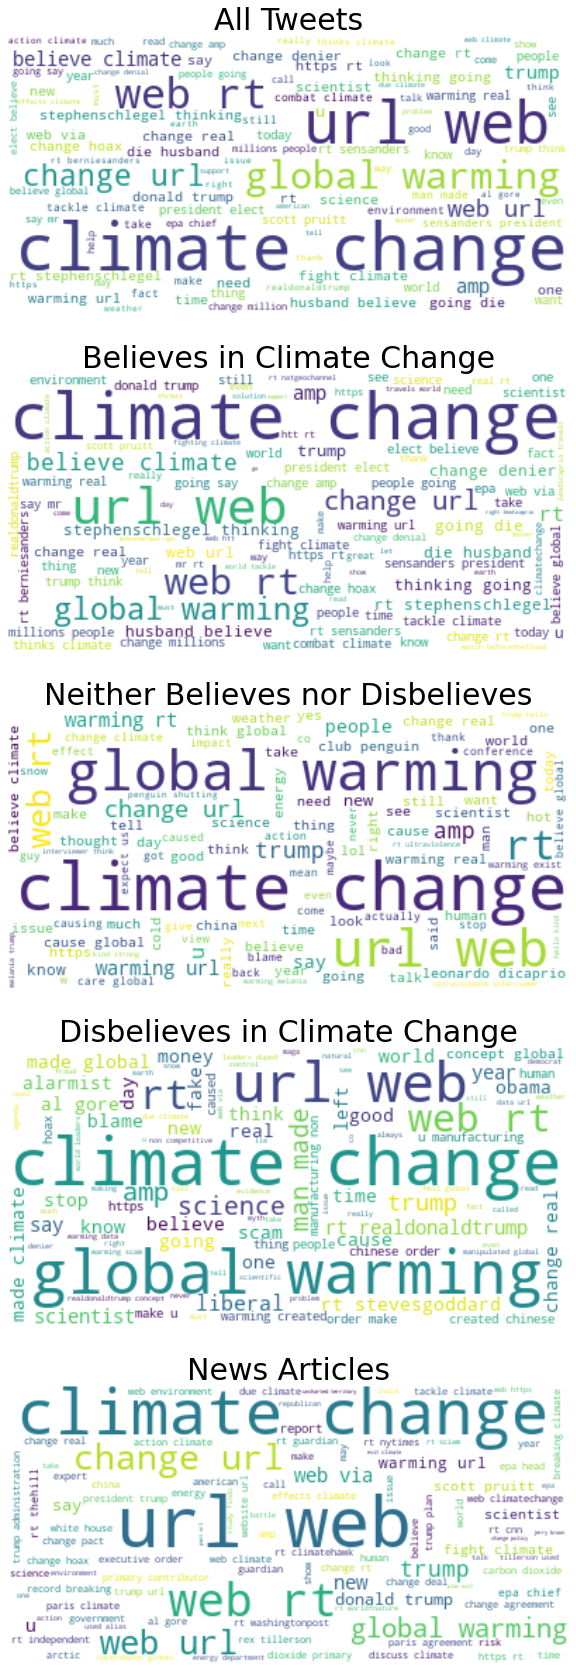

In [13]:
# Subsetting the dataframes:
df_1 = twitter[twitter['sentiment']==1]
df_0 = twitter[twitter['sentiment']==0]
df_n =twitter[twitter['sentiment']==-1]
df_news =twitter[twitter['sentiment']==2]

# joining the words to form the wordcloud
tweet_All = " ".join(review for review in twitter.message)
tweet_1 = " ".join(review for review in df_1.message)
tweet_0 = " ".join(review for review in df_0.message)
tweet_n = " ".join(review for review in df_n.message)
tweet_news = " ".join(review for review in df_news.message)

fig, ax = plt.subplots(5, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_1)
wordcloud_0 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_0)
wordcloud_n = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_n)
wordcloud_news = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_news)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_1, interpolation='bilinear')
ax[1].set_title('Believes in Climate Change',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_0, interpolation='bilinear')
ax[2].set_title('Neither Believes nor Disbelieves',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_n, interpolation='bilinear')
ax[3].set_title('Disbelieves in Climate Change',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_news, interpolation='bilinear')
ax[4].set_title('News Articles',fontsize=30)
ax[4].axis('off')

From the word clouds it is observed that all the classes share a lot of the words, but in diffferent quantities. This will be vital to the classifier in order to make good predictions

## Hashtags and Twitter Handles

Hashtags are used to make a statement about something, or to start a conversation around a specific topic or trend. In twitter data a lot of hashtags are generally used and may contain viable information that indicate a certain sentiment towards a specific topic. However, hashtags are a compressed set of words or sentences and since they are recorded as 1 word it may be hard for the model to decipher them. 
Twitter handles are also known as Twitter Usernames, and therefore Twitter Handles identify the individual or company who composed the tweet. 
The hashtags and handles will be extracted and plotted to show which handles and hashtags appear the most frequently.

In [14]:
# function to collect hashtags
def hashtag_extract(x):
    '''This function takes in text, finds all of the words that start with a hashtag, and returns the word'''
    # initialise an empty list
    hashtags = [] 
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)#regex to find hashtags
        hashtags.append(ht) # add the words to the list
    return hashtags

In [15]:
# Function to Collect Handles
def handle_extract(x):
    '''This function takes in text, finds all of the words that start with a '@' symbol, and returns the word'''
    # initialise an empty list
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)#regex to find handles
        handles.append(h)# add the words to the list
        
    return handles

The hastags and handles will be extracted and plotted.

In [16]:
# extracting hashtags from neutral tweets

HT_neutral = hashtag_extract(twitter['message'][twitter['sentiment'] == 0])

# extracting hashtags from belivers in climate change
HT_believe = hashtag_extract(twitter['message'][twitter['sentiment'] == 1])

# extracting hashtags from belivers in climate change
HT_disbelive = hashtag_extract(twitter['message'][twitter['sentiment'] == -1])

# extracting hashtags from belivers in climate change
HT_news = hashtag_extract(twitter['message'][twitter['sentiment'] == 2])

# unnesting list
HT_neutral = sum(HT_neutral,[])
HT_believe = sum(HT_believe,[])
HT_disbelive = sum(HT_disbelive,[])
HT_news = sum(HT_news,[])

In [17]:
# extracting handles from neutral tweets

HD_neutral = handle_extract(twitter['message'][twitter['sentiment'] == 0])

# extracting hashtags from belivers in climate change
HD_believe = handle_extract(twitter['message'][twitter['sentiment'] == 1])

# extracting hashtags from belivers in climate change
HD_disbelive = handle_extract(twitter['message'][twitter['sentiment'] == -1])

# extracting hashtags from belivers in climate change
HD_news = handle_extract(twitter['message'][twitter['sentiment'] == 2])

# unnesting list
HD_neutral = sum(HD_neutral,[])
HD_believe = sum(HD_believe,[])
HD_disbelive = sum(HD_disbelive,[])
HD_news = sum(HD_news,[])

## Plots showing the distribution of hashtags

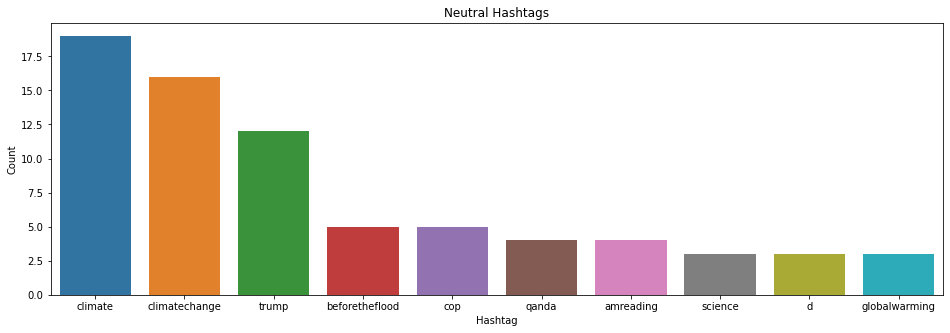

In [18]:
# Distribution plot of neutral hastags
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set_title('Neutral Hashtags')
plt.show()

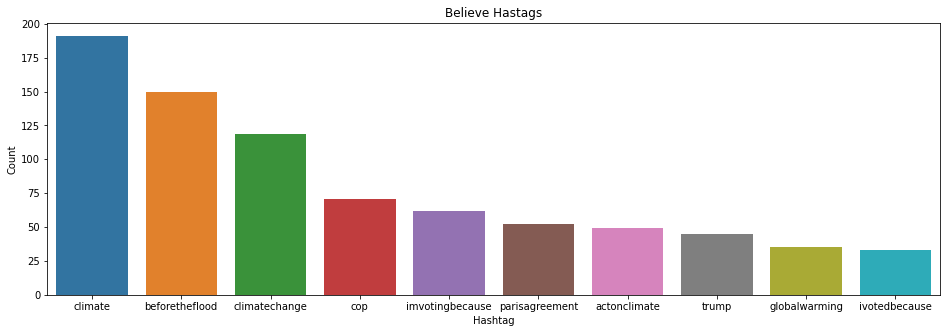

In [19]:
# Distribution plot of positive hastags
a = nltk.FreqDist(HT_believe)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set_title('Believe Hastags')
plt.show()

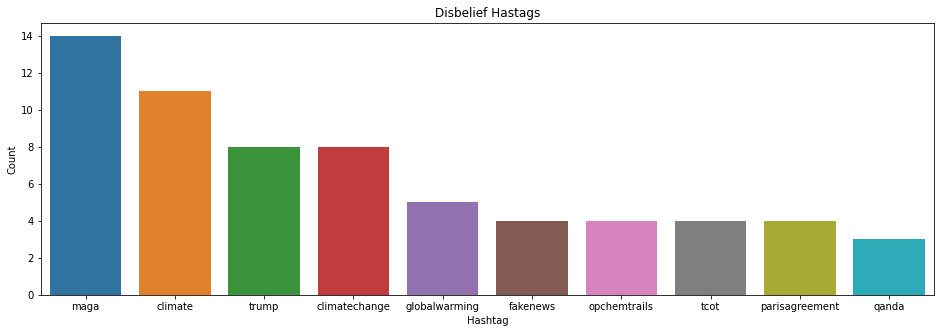

In [20]:
# Distribution plot of negative hastags
a = nltk.FreqDist(HT_disbelive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
ax.set_title('Disbelief Hastags')
plt.show()

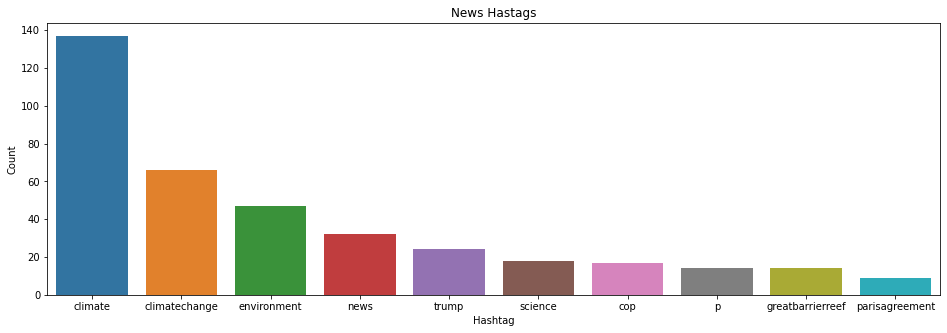

In [21]:
# Distribution plot of news hashtags
a = nltk.FreqDist(HT_news)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set_title('News Hastags')
ax.set(ylabel = 'Count')
plt.show()

As was obsrved in the wordclouds, there are similar hashtags across the classes, but in differing quantities.

## Plots showing the distribution of Twitter Handles

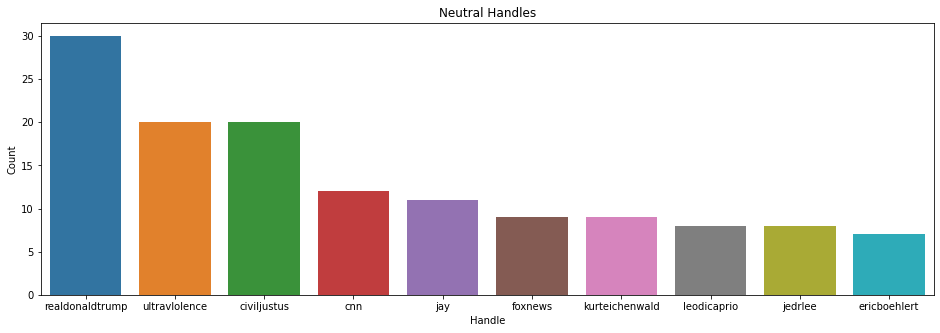

In [22]:
# Distribution plot of neutral handles
a = nltk.FreqDist(HD_neutral)
d = pd.DataFrame({'Handle': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent handles     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Handle", y = "Count")
ax.set(ylabel = 'Count')
ax.set_title('Neutral Handles')
plt.show()

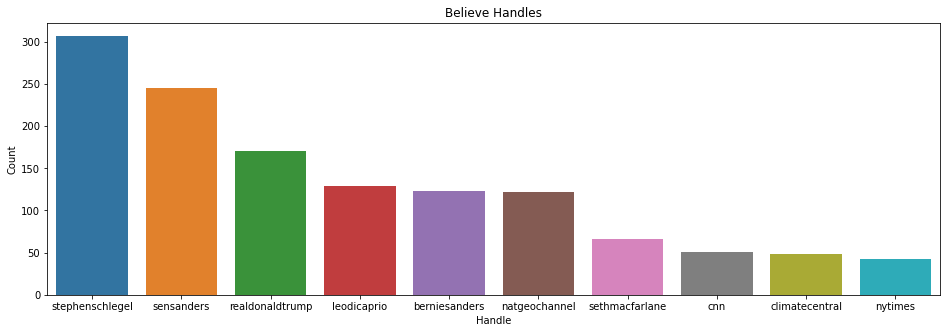

In [23]:
# Distribution plot of positive handles
a = nltk.FreqDist(HD_believe)
d = pd.DataFrame({'Handle': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent handles     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Handle", y = "Count")
ax.set(ylabel = 'Count')
ax.set_title('Believe Handles')
plt.show()

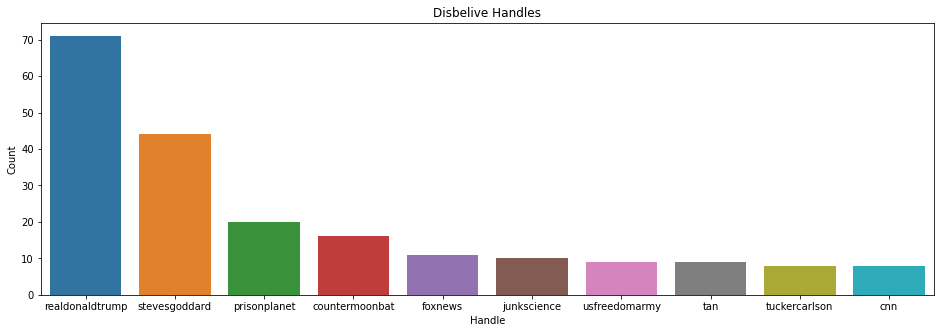

In [24]:
# Distribution plot of negative handles
a = nltk.FreqDist(HD_disbelive)
d = pd.DataFrame({'Handle': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent handles     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Handle", y = "Count")
ax.set(ylabel = 'Count')
ax.set_title('Disbelive Handles')
plt.show()

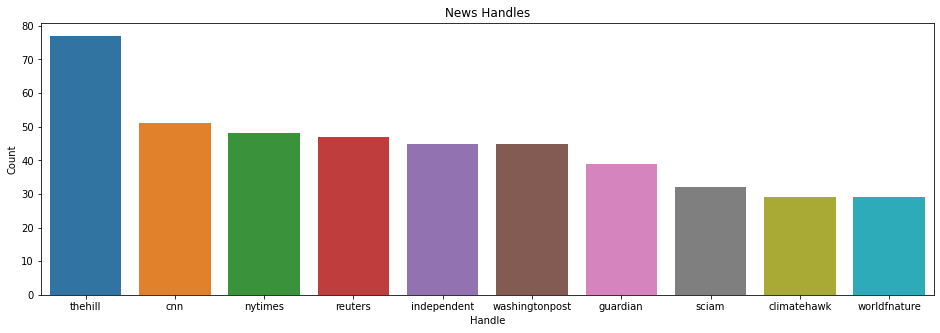

In [25]:
# Distribution plot of news handles
a = nltk.FreqDist(HD_news)
d = pd.DataFrame({'Handle': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent handles     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Handle", y = "Count")
ax.set(ylabel = 'Count')
ax.set_title('News Handles')
plt.show()

These hashtags and handles all show a differntiation between the classes, therefore we will not remove them in the preprocessing step.

## 5. Pre-processing
<a id='prep'></a>
[Back to table of contents](#toc)

In this step, we will prepare the dataframe to be vectorized based on what was observed in the exploratory data analysis, after which the model building can commence.

### Combing training and testing set
The traing and testing data will be combined in order for the preprocessing to be done only once.

In [6]:
# Combining the training and testing sets
combi = train.append(test, ignore_index=True)
combi.head()

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### Function for Pre-Processing
In order to effeciently pre-process the data, a custom function will be created.
This function will remove html characters, convert all the tweets to lower case,
remove any special characters, numbers and punctuation, remove words that have fewer than three characters,
remove english stopwords, tokenize the tweets and a apply a stemmmer to normalise the words.

In [7]:
def preprocessing(df):
    '''This function takes in a dataframe, and transforms the text column in order for it to be vectorized'''
    # Create a new column for the preprocessed message and remove HTML tags
    df['tidy_message'] = df['message'].str.replace('<[^<]+?>', " ")
    #convert to lower case
    df['tidy_message'] = df['tidy_message'].apply(lambda x: x.lower())
    # remove special characters, numbers, punctuations
    df['tidy_message'] = df['tidy_message'].str.replace("[^a-zA-Z#]", " ")
    #remove short words
    df['tidy_message'] = df['tidy_message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    # Creating token for the clean tweets
    df['tidy_message'] = df['tidy_message'].apply(lambda x: word_tokenize(x))
    #removing stopwords
    stop_words = set(stopwords.words('english'))
    df['tidy_message'] = df['tidy_message'].apply(lambda x:[word for word in x if not word in stop_words])
    stemming = PorterStemmer()
    df['tidy_message'] = df['tidy_message'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
    return df

### Creating a new DataFrame
A new dataframe is created using the function.

In [8]:
combi_done = preprocessing(combi) # Applying the function
combi.head()# Viewing the head of the pre-processed dataframe

,sentiment,message,tweetid,tidy_message
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor chief think carbon dioxid main ca...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,like lack evid anthropogen global warm
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rawstori research three year climat chang late...
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,# todayinmak # wire pivot year climat chang ht...
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,soynoviodetoda racist sexist climat chang deni...


In [9]:
# After the pre-processing is done, the dataframe is again split between the training and testing sets.
train = combi_done[:15819]
test = combi_done[15819:].drop(['sentiment'], axis=1)

## 6. Feature Extraction 
<a id='vect'></a>
[Back to table of contents](#toc)

We start by extracting features from text data using Count Vectorizor for SKLearn. The count vectorizer learns vocabulary from the text data and then proceeds to tokenize and create feature vectors from the text. Each word or group of words is then represented by a unique vector depending on it's tokens, where the columns inside the vectors represent the features (which is the different words in the vocabulary) and the values represent the count of each word present in the tweet, as can be seen from the illustration below.

<img src="https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/assets/atap_0408.png" style="width:500px;height:400px">

### Creating the word vectors

In [10]:
max_feats = 170000 #change this number to play around
vectorizer = CountVectorizer(analyzer = 'word',max_features = max_feats,min_df = 1,ngram_range = (1,2)) # Initialise the vetorizer 
# Building a Pipeline for word vectorization
bow = Pipeline( [('bow', vectorizer)] )
train_bow = bow.fit_transform(train['tidy_message'])
test_bow = bow.transform(test['tidy_message'])

### Splitting the data into 80% training and 20% testing for model building and evaluation

In [11]:
# Splitting the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(train_bow, train['sentiment'],
                                                    test_size = 0.2, random_state=42,
                                                    stratify=train['sentiment'])

### Class imbalance
The class imbalance was addressed by using the SMOTE library, but it was found to be ineffective with regards to improving the models, and thus it was left out.

## 7. Model Training 
<a id='train'></a>
[Back to table of contents](#toc)

A variety of models will now be trained and tested in order to make a final selection for the model.

### Logistic Regression


#### The basic concept  

Logistic regression is a very popular machine learning model used for classification. Rather than modeling a response (tweets in our case) directly, logistic regression models the probability that this response belongs to a particular category/class. Logistic regression uses the sigmoid curve.

Using a threshold *of your choice*, any observation falling below this threshold gets classified to class A. Conversely, any observation that falls above this threshold gets classified to class B.

- **Pro:** This method is scalable to large data and is also one of the more computationally efficient models.
- **Con:** Although it could be extended to multi-class problems (as is the case here), logistic regression is ideally used for binary classification.

### Multi-class Logistic Regression

The first model to be utilised is a Multi-Class Logistic Regression Model.
Also known as Multinomial Logistic Regression,this is a classification method that generalizes logistic regression to multiclass problems in order to make predictions for more than two classes. Multinomial Logistic Regression uses a one versus rest approach to make predictions.
A logistic Regression instance will be initialised, fit to the training data, and tested on both the training and testing data, as shown below.

In [12]:
# Logistic Regression
lr = LogisticRegression(max_iter=500,multi_class='ovr')
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)

print(lr)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

LogisticRegression(max_iter=500, multi_class='ovr')
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99      1037
         0.0       1.00      0.99      0.99      1882
         1.0       1.00      1.00      1.00      6824
         2.0       1.00      1.00      1.00      2912

    accuracy                           1.00     12655
   macro avg       1.00      0.99      1.00     12655
weighted avg       1.00      1.00      1.00     12655

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

        -1.0       0.73      0.36      0.49       259
         0.0       0.60      0.42      0.50       471
         1.0       0.75      0.87      0.80      1706
         2.0       0.76      0.75      0.76       728

    accuracy                           0.74      3164
   macro avg       0.71      0.60      0

As seen from the classification report, the Multi-Class Logistic Regression produces a weighted F1 score 0.72 on the testing set, which is better than average.  The precision is high across all classes, which indicate a high true positive rate, but the recall is very low for the -1 and 0 classes, which means the model is struggling to identify true positves for the minority classes. 

### Support Vector Machines

#### The basic concept  

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be employed for both classification and regression purposes.

SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes, as shown in the image below.

<img src="https://66.media.tumblr.com/ff709fe1c77091952fb3e3e6af91e302/tumblr_inline_o9aa8dYRkB1u37g00_540.png" style="width:500px;height:300px">

- **Pro:** Support vector machines can handle non-linear features and do not generally rely on the entire dataset (only the support vectors).
- **Con:** Sometimes it can be tricky to find the appropriate kernel, and these models are known to not necessarily be very efficient with large datasets.

The model will be fitted and evaluaed in the same fashion as the logistic regression model.

In [33]:
# Support Vector Machines
svm_1 = SVC(random_state = 42, C=1, gamma = 1, kernel = 'linear')
svm_1.fit(X_train,y_train)
y_train_hat = svm_1.predict(X_train)
y_test_hat = svm_1.predict(X_test)

print(svm_1)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

SVC(C=1, gamma=1, kernel='linear', random_state=42)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      1037
         0.0       1.00      1.00      1.00      1882
         1.0       1.00      1.00      1.00      6824
         2.0       1.00      1.00      1.00      2912

    accuracy                           1.00     12655
   macro avg       1.00      1.00      1.00     12655
weighted avg       1.00      1.00      1.00     12655

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

        -1.0       0.68      0.40      0.51       259
         0.0       0.54      0.47      0.51       471
         1.0       0.76      0.85      0.80      1706
         2.0       0.78      0.75      0.76       728

    accuracy                           0.73      3164
   macro avg       0.69      0.62      0

As seen from the classification report, the Support Vector Classifier produces a weighted F1 score 0.72 on the testing set, which the same the Logistic Regression Model.  The precision is high across all classes, which indicate a high true positive rate, but the recall is very low for the -1 and 0 classes, which means the model is struggling to identify true positves for the minority classes.

### Random Forest and Extra Trees Classifier

The Random Forest is an ensemble learning method which can be used for regression and classification models. This method operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Random forests are less prone to overfitting the data than decision trees. Adding one further step of randomization yields extremely randomized trees, or ExtraTrees. While similar to ordinary random forests in that they are an ensemble of individual trees, there are two main differences: first, each tree is trained using the whole learning sample (rather than a bootstrap sample), and second, the top-down splitting in the tree learner is randomized. Instead of computing the locally optimal cut-point for each feature under consideration (based on, e.g., information gain or the Gini impurity), a random cut-point is selected. This value is selected from a uniform distribution within the feature's empirical range (in the tree's training set). Then, of all the randomly generated splits, the split that yields the highest score is chosen to split the node. Similar to ordinary random forests, the number of randomly selected features to be considered at each node can be specified.

- **Pro:** Extra Trees is a non-parametric method, and thus able to find the relationships without contraints
- **Con:** Prone to overfitting

In [34]:
# Extra Trees
et = ExtraTreesClassifier(random_state=123,n_estimators=100)
et.fit(X_train, y_train)
y_train_hat = et.predict(X_train)
y_test_hat = et.predict(X_test)

print(et)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

ExtraTreesClassifier(random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      1037
         0.0       1.00      1.00      1.00      1882
         1.0       1.00      1.00      1.00      6824
         2.0       1.00      1.00      1.00      2912

    accuracy                           1.00     12655
   macro avg       1.00      1.00      1.00     12655
weighted avg       1.00      1.00      1.00     12655

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

        -1.0       0.74      0.29      0.42       259
         0.0       0.54      0.45      0.49       471
         1.0       0.70      0.88      0.78      1706
         2.0       0.79      0.58      0.67       728

    accuracy                           0.70      3164
   macro avg       0.69      0.55      0.59      3164

### Voting Classifier

A Voting Classifier is a machine learning model that uses an ensemble of different classification methods, and then chooses the output based on the highest probability.  The model aggregates the findings of each model that gets passed into the voting classifier and it predicts the class based on a majority vote.

- **Pro:** Combines and ensemble of models in order to get the best predictions from each model
- **Con:** Computationally Expensive

In [35]:
vt = VotingClassifier(estimators=[('lr', lr), ('svm', svm_1), ('et', et)], voting='hard')
vt.fit(X_train, y_train)
y_train_hat = vt.predict(X_train)
y_test_hat = vt.predict(X_test)

print(vt)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=500,
                                                 multi_class='ovr')),
                             ('svm',
                              SVC(C=1, gamma=1, kernel='linear',
                                  random_state=42)),
                             ('et', ExtraTreesClassifier(random_state=123))])
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00      1037
         0.0       1.00      1.00      1.00      1882
         1.0       1.00      1.00      1.00      6824
         2.0       1.00      1.00      1.00      2912

    accuracy                           1.00     12655
   macro avg       1.00      1.00      1.00     12655
weighted avg       1.00      1.00      1.00     12655

Test performance
-------------------------------------------------------
              pr

The Voting Classifier performs very similarly to the Linear Regression and the Support Vector Classifier, however, the Voting Classifier performes the best on the Kaggle Leaderboard.

## 8. Model Performance Evaluation 
<a id='eval'></a>
[Back to table of contents](#toc)

That metrics that will be used for evaluation include, precision, recall, and f1 score.  Each of these metrics will be evaluated per class for each model, then the weighted average will be evaulated for each model.

### Precision
Precision is defined as the ratio between the true positive classifications and all of the positive classifications.  Precision is a measure of how well the model predicts actual positive classifications.  In simpler terms, this metric shows how many correct positve classifications the model made out of all the positive classifications.  Precision is a good measure to look at when false positives are problematic.

Precision is calculated with the below equation:
$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

### Recall
Recall is a measure of how good the model is at identifiying true positives. Recall measures the total number of positive predictions by the model and compares it to the total true positive values.  Recall is an important measure when false negative observations are problematic.

Recall is calculated with the below equation:
$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$


### F1 Score
The F1 score is the harmonic mean of Precision and Recall. The F1 score takes both Precision and Recall into account when forming a metric to evaluate a model.  F1 score shows how well a model performs taking into account the the false postives and false negatives that the model produces.  The F1 score is the best metric to use when there is a need to have a balance between Precision and Recall, as well as when there is a class imbalance.  The problem of classifying tweets satisies both of these conditions.

F1 score is calculated with the below equation:
$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

### Visualising the results.
The weighted averages of the three metrics will be used to evaluate each model.

In [36]:
#We will create dictionaries of the metrics for each model
precision = {u'LR':0.73, u'SVC': 0.73, u'Extra Trees':0.7,u'Voting Classifier': 0.73}
recall = {u'LR':0.74, u'SVC Classifier': 0.73, u'Extra Trees':0.7,u'Voting Classifier': 0.74}
f1_score = {u'LR':0.72, u'SVC': 0.72, u'Extra Trees':0.68,u'Voting Classifier': 0.72}

The results will be plotted using bar graphs.

Text(0, 0.5, 'Test Precision')

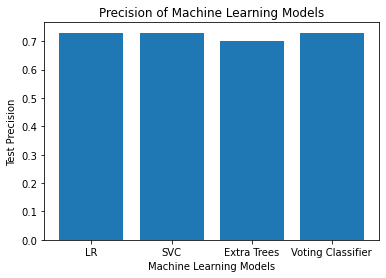

In [37]:
plt.bar(range(len(precision)), list(precision.values()), align='center')
plt.xticks(range(len(precision)), list(precision.keys()))
plt.title("Precision of Machine Learning Models")
plt.xlabel("Machine Learning Models")
plt.ylabel("Test Precision")

With regards to Precision, all the models performed equally except for the Extra Trees Model.

Text(0, 0.5, 'Test Recall')

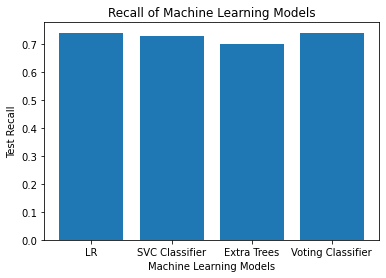

In [38]:
plt.bar(range(len(recall)), list(recall.values()), align='center')
plt.xticks(range(len(recall)), list(recall.keys()))
plt.title("Recall of Machine Learning Models")
plt.xlabel("Machine Learning Models")
plt.ylabel("Test Recall")

With regards to Recall, all the models performed equally except for the Extra Trees Model.

Text(0, 0.5, 'Test F1 Score')

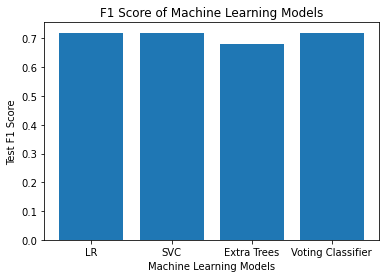

In [39]:
plt.bar(range(len(f1_score)), list(f1_score.values()), align='center')
plt.xticks(range(len(f1_score)), list(f1_score.keys()))
plt.title("F1 Score of Machine Learning Models")
plt.xlabel("Machine Learning Models")
plt.ylabel("Test F1 Score")

With regards to Recall, all the models performed equally except for the Extra Trees Model.

### Choosing the final model

From the above, the three best models are the Logistic Regression, Support Vector Classifier, and the Voting Classifier.  All of these models have very similar scores on all of the metrics.  The Voting Classifier was chosen as the final model, as it performed the best on the Kaggle Competition.

## 9. Conclusion 
<a id='conclude'></a>
[Back to table of contents](#toc)

In conlcusion, we have developed a machine learning model, using a Voting Classifier , that can reliably Classify text into four different catagories. The weighted F1 score for the Voting Classifier is 0.74 on Kaggle, which given the problem and the context, is a defensible metric for the model. The model excels at predicting the classes that believe in climate change and the news articles, but struggles to correctly predict the two minority classes, which are those who disbelieve in climate change, and those who are neutral.  This is most likely due to the fact that the classifier did not get enough data from those classes, and the words used in the text may be misleading.  

It is important to consider the fact that this is only the best model developed thus far, and with further tweaking and testing, a better model can be developed over time.  Machine Learning models need to be updated regularly in order to improve the model and to adjust as new information and requirements come to light.

## 10. Kaggle Submission 
<a id='kaggle'></a>
[Back to table of contents](#toc)

In [42]:
# Making predictions on the test data set for SVM
submission_svm_1 = svm_1.predict(test_bow)
submission_svm_1_df = pd.DataFrame( data = {'tweetid': test['tweetid'],
                               'sentiment': submission_svm_1 })
submission_svm_1_df.sentiment = submission_svm_1_df.sentiment.astype(int)

In [43]:
# Creating a csv file
submission_svm_1_df.to_csv('vt.csv', index = False)
submission_svm_1_df.head()

,tweetid,sentiment
15819,169760,1
15820,35326,1
15821,224985,1
15822,476263,1
15823,872928,0


In [41]:
# Making predictions on the test data set for VT
submission_vt = vt.predict(test_bow)
submission_vt_df = pd.DataFrame( data = {'tweetid': test['tweetid'],
                               'sentiment': submission_vt })
submission_vt_df.sentiment = submission_vt_df.sentiment.astype(int)

In [44]:
# Creating a csv file
submission_vt_df.to_csv('vt.csv', index = False)
submission_vt_df.head()

,tweetid,sentiment
15819,169760,1
15820,35326,1
15821,224985,1
15822,476263,1
15823,872928,0
